In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/cygnet/Downloads/weather.csv')
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [3]:
new =df[['Date.Month','Station.City','Data.Precipitation']].groupby(['Date.Month','Station.City']).mean()

In [4]:
new = new.reset_index()
new.head()

,Date.Month,Station.City,Data.Precipitation
0,1,Aberdeen,0.025000
1,1,Abilene,0.006667
2,1,Akron,0.295000
3,1,Alamosa,0.115000
4,1,Albany,0.245000


In [18]:
li = list()
empty_frame = {}
for i in new['Date.Month'].unique():
    top_1  = new[new['Date.Month'] == i].nlargest(10 , columns=['Data.Precipitation'])
    top_1.reset_index(drop = True, inplace = True)
    li.append(top_1)
modify_date = pd.concat(li) 
modify_date.head()

,Date.Month,Station.City,Data.Precipitation
0,1,Quillayute,3.230000
1,1,Ketchikan,3.003333
2,1,Yakutat,2.636667
3,1,Astoria,2.555000
4,1,Evansville,2.383333


In [67]:

import plotly.express as px
fig = px.bar(modify_date , x = "Date.Month" , y = "Data.Precipitation" , color = 'Station.City')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="lightgreen",
)
fig.update_yaxes(ticklabelposition="outside", title=None)
fig.update_yaxes(title_text="Average Precipitation",title_standoff=15
                 , color='crimson')
fig.update_yaxes(nticks=12,tick0=0.25, dtick=0.5)
fig.update_xaxes(title_text="Months",color='crimson')
fig.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 120 artists>

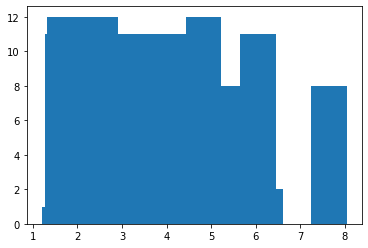

In [28]:
plt.bar(x='Data.Precipitation',height='Date.Month',data=modify_date,)

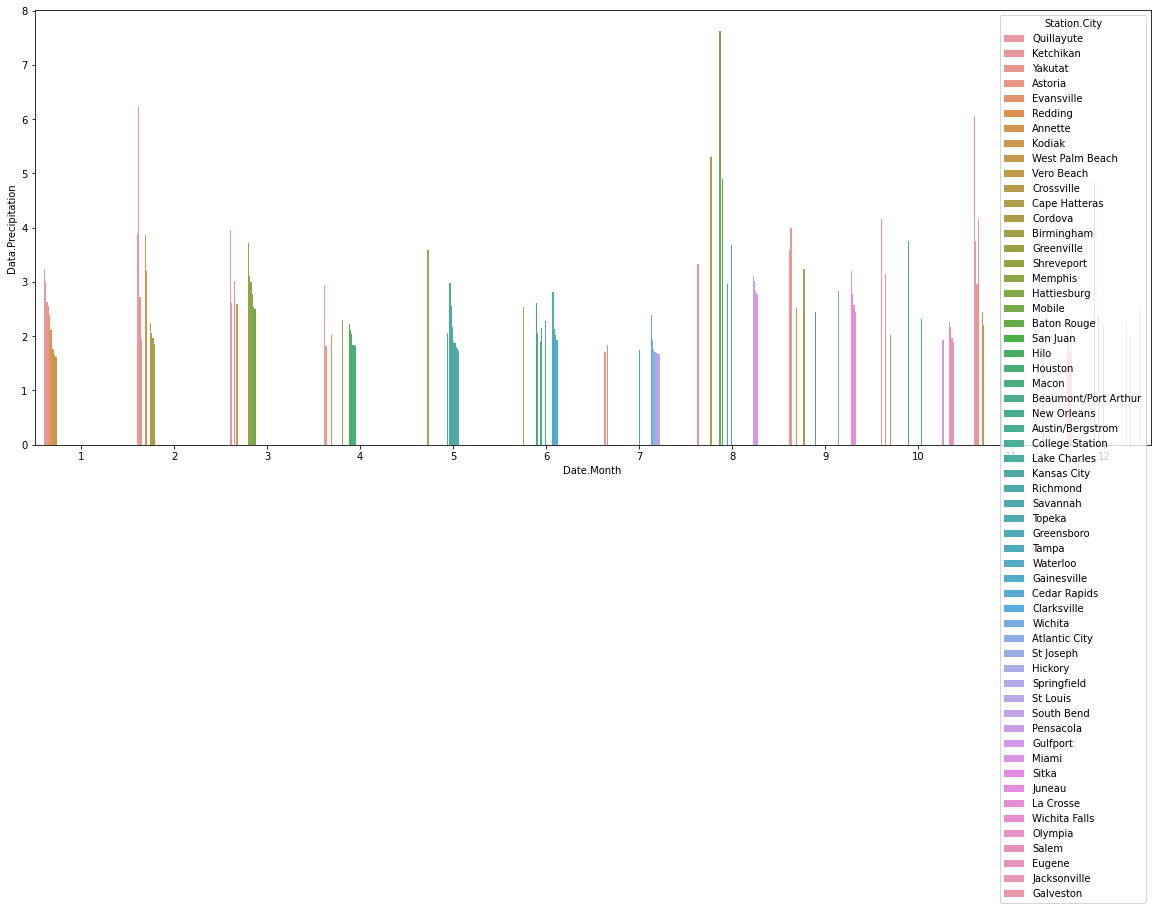

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(x='Date.Month',y='Data.Precipitation',hue='Station.City',data=modify_date)
plt.show()

In [6]:
df.nlargest(10, columns='Data.Precipitation')

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
10224,20.89,2016-08-14,8,14,2016,Baton Rouge,BTR,"Baton Rouge, LA",Louisiana,80,85,74,25,6.21
6397,15.19,2016-05-22,5,22,2016,Vero Beach,VRB,"Vero Beach, FL",Florida,80,89,70,19,6.05
10824,14.03,2016-08-28,8,28,2016,Hilo,ITO,"Hilo, HI",Hawaii,77,82,71,21,2.41
3304,13.36,2016-03-13,3,13,2016,Greenville,GLH,"Greenville, MS",Mississippi,65,71,58,11,9.54
419,12.65,2016-01-10,1,10,2016,Evansville,EVV,"Evansville, IN",Indiana,36,45,26,21,4.52
3280,12.02,2016-03-13,3,13,2016,Shreveport,SHV,"Shreveport, LA",Louisiana,66,73,59,11,8.31
12722,11.52,2016-10-09,10,9,2016,Savannah,SAV,"Savannah, GA",Georgia,74,80,67,12,13.25
3411,10.58,2016-03-13,3,13,2016,Memphis,MEM,"Memphis, TN",Tennessee,63,68,57,13,7.17
12879,10.49,2016-10-09,10,9,2016,Charleston,CHS,"Charleston, SC",South Carolina,73,79,66,12,12.20
2538,10.34,2016-02-28,2,28,2016,Ketchikan,KTN,"Ketchikan, AK",Alaska,43,47,39,13,12.08
